### Importar librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Preparación del dataset

In [2]:
# Preparar tipos de datos
tipos_datos = {
	"Row ID": int,
	"Order ID": str,
	"Order Date": str,
	"Ship Date": str,
	"Ship Mode": str,
	"Customer ID": str,
	"Customer Name": str,
	"Segment": str,
	"City": str,
	"State": str,
	"Country": str,
	"Postal Code": str,
	"Market": str,
	"Region": str,
	"Product ID": str,
	"Category": str,
	"Sub-Category": str,
	"Product Name": str,
	"Sales": float,
	"Quantity": int,
	"Discount": float,
	"Profit": float,
	"Shipping Cost": float,
	"Order Priority": str
}

In [3]:
# Cargar datos
df = pd.read_csv('/Users/josejp/Documents/2025/2_UNIR/CursoPython/workspace/Python-UNIR/src/project_4/superstore_dataset2012.csv', dtype=tipos_datos)

In [4]:
# Mostrar dimensiones
print("Dimensiones del DataFrame:", df.shape)
# Listar columnas
# Tipo de datos
print("Tipos de datos de las columnas:", df.dtypes)
# Describir columnas
print("Descripción estadística del DataFrame:")
print(df.describe(include='all'))
# Mostrar las primeras columnas
print("Primeras 5 filas del DataFrame:")
print(df.head(5))



Dimensiones del DataFrame: (4246, 24)
Tipos de datos de las columnas: Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code        object
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object
Descripción estadística del DataFrame:
              Row ID       Order ID Order Date  Ship Date       Ship Mode  \
count    4246.000000           4246       4246       4246            4246   
unique           NaN           2127        141        203               4   
top              NaN  

### Transformar datos

In [6]:
# Todos los campos de texto de None a vacio
df = df.fillna({
	"Order ID": "",
	"Order Date": "",
	"Ship Date": "",
	"Ship Mode": "",
	"Customer ID": "",
	"Customer Name": "",
	"Segment": "",
	"City": "",
	"State": "",
	"Country": "",
	"Market": "",
	"Region": "",
	"Product ID": "",
	"Category": "",
	"Sub-Category": "",
	"Product Name": "",
	"Order Priority": "",
	"Postal Code": ""
})

# Todas las fechas al mismo formato DDMMYYYY y en datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, infer_datetime_format=True, format='mixed')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, infer_datetime_format=True, format='mixed')


/var/folders/hk/hc_3jxjx6l3_q31yrc71m_sw0000gn/T/ipykernel_21664/3879002219.py:24: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, infer_datetime_format=True, format='mixed')
/var/folders/hk/hc_3jxjx6l3_q31yrc71m_sw0000gn/T/ipykernel_21664/3879002219.py:25: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, infer_datetime_format=True, format='mixed')


In [7]:
# Describir columnas para asegurar que todo está correcto
print("Descripción estadística del DataFrame:")
print(df.describe(include='all'))

Descripción estadística del DataFrame:
              Row ID       Order ID                     Order Date  \
count    4246.000000           4246                           4246   
unique           NaN           2127                            NaN   
top              NaN  IN-2012-44194                            NaN   
freq             NaN             11                            NaN   
mean    25248.240226            NaN  2012-07-24 16:49:58.021667328   
min        66.000000            NaN            2012-01-02 00:00:00   
25%     12424.250000            NaN            2012-05-09 00:00:00   
50%     24848.000000            NaN            2012-08-07 00:00:00   
75%     37522.750000            NaN            2012-10-12 00:00:00   
max     51289.000000            NaN            2012-12-12 00:00:00   
std     14711.393243            NaN                            NaN   

                            Ship Date       Ship Mode Customer ID  \
count                            4246            42

### Visualización Univariable Matplotlib

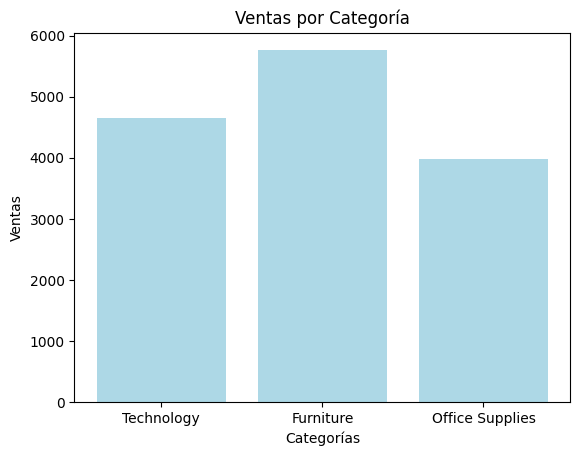

In [ ]:
# Histograma
plt.bar(df['Category'], df['Sales'], facecolor='lightblue')
plt.xlabel('Categorías')
plt.ylabel('Ventas')
plt.title('Ventas por Categoría')
plt.show()

# Conclusiones:
# - La categoria con mayor ventas es la de Furniture, despues Tecnologia y Office Supplies

### Visualización Univariante Seaborn

<Axes: xlabel='Quantity'>

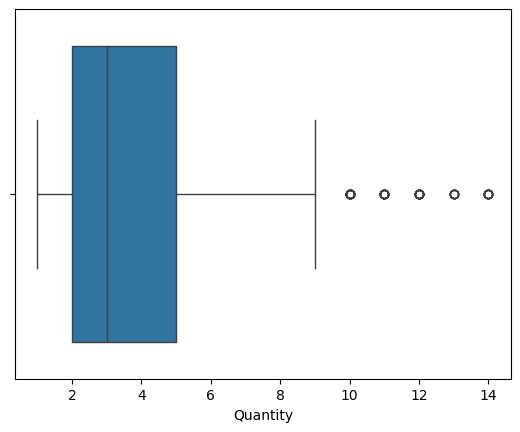

In [ ]:
sns.boxplot(data=df, x='Quantity')

# Conclusiones:
#  - Las cantidades vendidas van entre 2 y 5 unidades mayoritariamente, con algunos outliers que llegan hasta 14 unidades.
#  - La mediana de las cantidades vendidas está alrededor de 3 unidades.

### Visualización Bivariante con Matplotlib

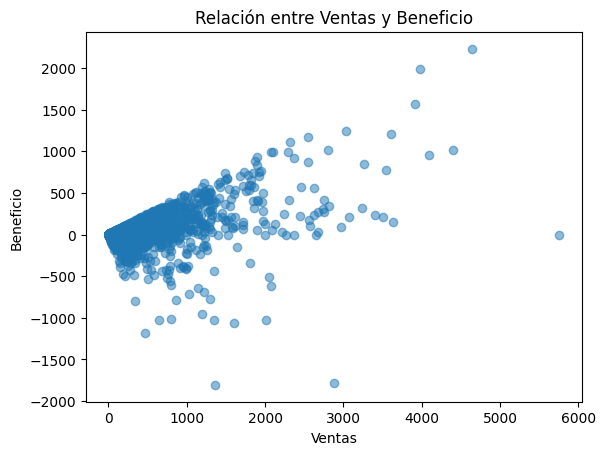

In [ ]:
plt.scatter(df['Sales'], df['Profit'], alpha=0.5)
plt.xlabel('Ventas')
plt.ylabel('Beneficio')
plt.title('Relación entre Ventas y Beneficio')
plt.show()

# Conclusiones:
# - Se observa bastante concentración de ventas hasta 1000 unidades monetarias. Tambien se observa perdidas en el mismo rango de ventas.

### Visualización Bivariante con Seaborn

Text(0.5, 1.0, 'Relación entre Ventas y Beneficio con Línea de Tendencia')

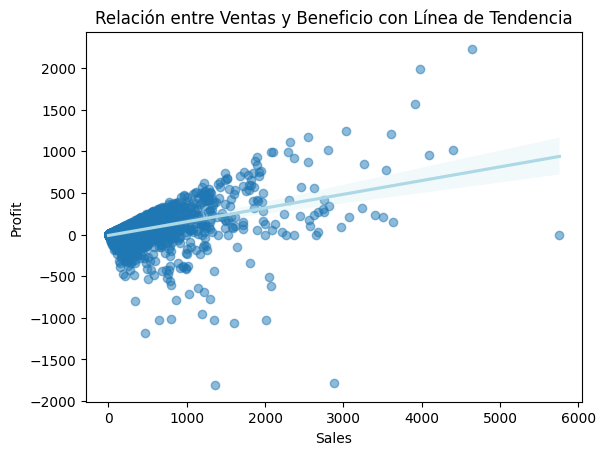

In [ ]:
sns.regplot(data=df, x='Sales', y='Profit', scatter_kws={'alpha':0.5}, line_kws={'color':'lightblue'})
plt.title('Relación entre Ventas y Beneficio con Línea de Tendencia')
# Conclusiones:
# - Existe una relación positiva entre ventas y beneficio.
# - A medida que aumentan las ventas, el beneficio tiende a aumentar también.
# - Hay ventas con beneficios en negativo, lo que indica pérdidas en algunas transacciones.

### Visualización Multivariante con Seaborn

Text(0.5, 1.02, 'Pairplot de Ventas, Beneficio y Coste de Envío por Mercado')

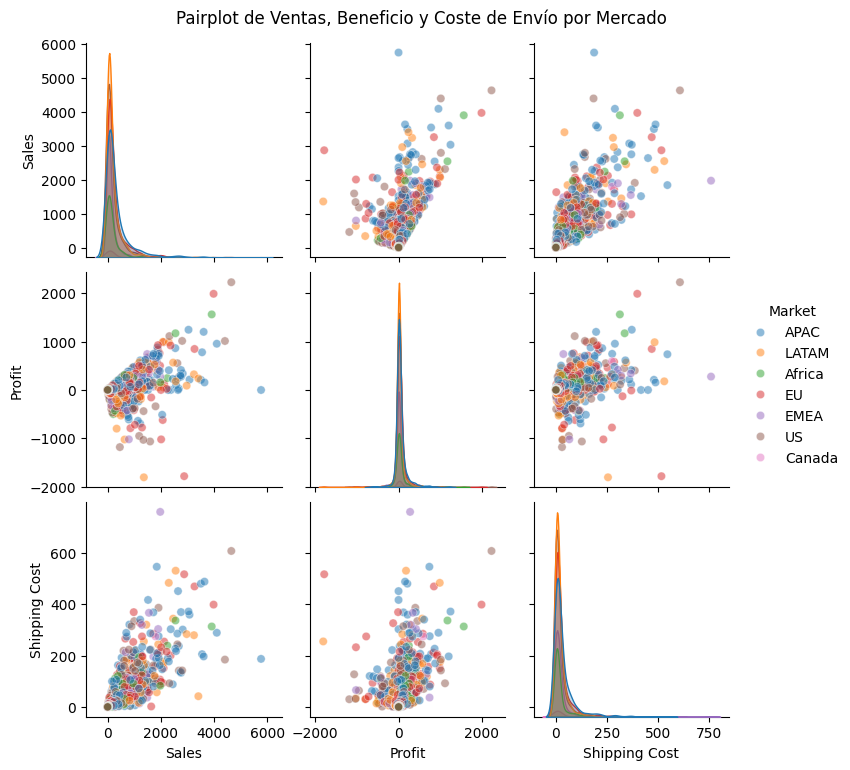

In [ ]:
sns.pairplot(df[['Sales', 'Profit', 'Shipping Cost', 'Market']], diag_kind='kde', plot_kws={'alpha':0.5}, hue='Market')
plt.suptitle('Pairplot de Ventas, Beneficio y Coste de Envío por Mercado', y=1.02)
# Grafico donde se vea la relación entre ventas y beneficio, diferenciando por mercado

# Como conclusiones se pueden sacar varias cosas:
# - La mayoría de las ventas y beneficios provienen de ciertos mercados específicos.
# - Hay una correlación positiva entre ventas y beneficios, aunque con cierta dispersión.
# - Se tiene presencia en diferentes mercados del mundo pero los beneficios en algunas ventas son negativos, lo que indica posibles problemas de costos o descuentos excesivos. Confirmar si se trata de alguna estrategia comercial o un error en los datos.


### Visualización de SubPlots diferentes

Text(0.5, 1.02, 'PairGrid de Ventas, Beneficio y Coste de Envío por Segmento')

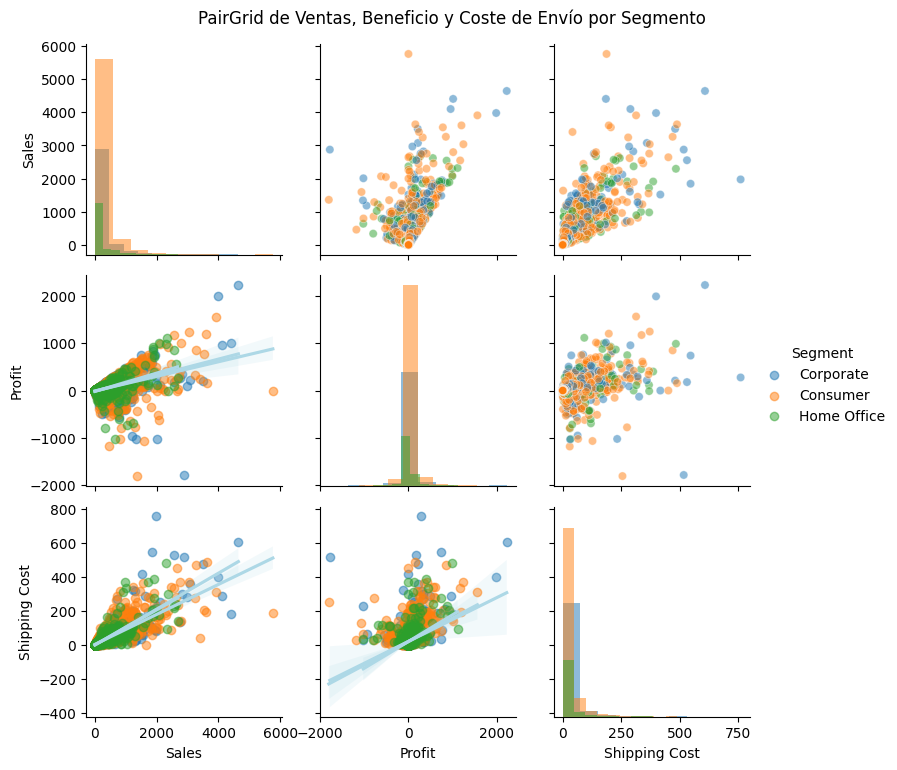

In [ ]:
g = sns.PairGrid(df, vars=['Sales', 'Profit', 'Shipping Cost'], hue='Segment')
g.map_upper(sns.scatterplot, alpha=0.5)
g.map_diag(plt.hist, alpha=0.5)
g.map_lower(sns.regplot, scatter_kws={'alpha':0.5}, line_kws={'color':'lightblue'})
g.add_legend()
plt.suptitle('PairGrid de Ventas, Beneficio y Coste de Envío por Segmento', y=1.02)
# Grafico donde se puede observar la relación entre ventas y beneficio, diferenciando por segmentos de clientes.
# Cada segmento tiene un color diferente, y se incluyen histogramas en la diagonal para mostrar la distribución de cada variable.
# Además, se añaden líneas de regresión en la parte inferior para visualizar mejor las tendencias dentro de cada segmento.

# Como conclusiones se pueden sacar varias cosas:
# - Diferentes segmentos de clientes muestran patrones similares en la relación entre ventas y beneficios.
# - La mayoría de los segmentos tienen una correlación positiva entre ventas y beneficios, aunque con diferentes niveles de dispersión.
# - Hay productos con beneficios en negativo a pesar de tener ventas, lo que podría indicar problemas de costos o descuentos excesivos.

### Guardar la última imagen

In [109]:
g.savefig('pairgrid_segment.png')